# Attribute Importance for Concept Drift - Primary and Secondary Drift Detection in one dataset

This notebook allows to detect primary and related secondary driftpoints according to the master thesis' framework.

The user specifies a file path for the dataset to analyze and builds the primary as well as secondary drift detectors.

Outputs are graphs as well as drift point lists.

## Setup
### Imports

In [1]:
# imports
import helper
from pm4py.objects.log.importer.xes import importer as xes_importer

from processdrift.framework import drift_detection
from processdrift.framework import drift_explanation
from processdrift.framework import feature_extraction
from processdrift.framework import pop_comparison
from processdrift.framework import windowing

### Data settings and event log loading

In [2]:
# data settings
data_file_path = 'data/synthetic/attribute_drift/simple/10000/cf10k_0c7a618f-74e8-4d37-9edd-30c99f90b95d.xes'

# load event log
event_log = xes_importer.apply(data_file_path)

c:\Users\Lennart\Tools\Anaconda3\envs\concept_drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 10000/10000 [00:10<00:00, 930.09it/s]


### Configure Primary Drift Detector

In [3]:
# alternative 1: ProDrift Drift detector
primary_process_drift_detector = drift_detection.DriftDetectorProDrift(path_to_prodrift='ProDrift2.5/ProDrift2.5.jar',
                                                                        drift_detection_mechanism='runs',
                                                                        window_size=200,
                                                                        window_mode='adaptive',
                                                                        detect_gradual_as_well=False)

In [4]:
# alternative 2: Configure custom drift detector
# the user can select 
# - a primary feature extractor, specifying which primary axis feature to use
# - a window generator (fixed size or adaptive) incl. the window sizes and further settings
# - a population comparer
# - a threshold for detecting the change points

# primary_feature_extractor = feature_extraction.RelationshipTypesCountFeatureExtractor('Relationship types count')
# primary_window_generator = windowing.FixedSizeWindowGenerator(window_size=150, slide_by=1)
# primary_population_comparer = pop_comparison.HotellingsTSquaredPopComparer()
# primary_threshold = 0.5
# primary_process_drift_detector = drift_detection.DriftDetector(primary_feature_extractor, 
#                                                                primary_window_generator,
#                                                                primary_population_comparer, 
#                                                                threshold=primary_threshold)

In [5]:
# alternative 3: drift detector true known
# primary_process_drift_detector = drift_detection.DriftDetectorTrueKnown(helper.get_change_points_maardji_et_al_2013(10000))

### Configure Secondary Drift Detectors

The user can specify a list of secondary drift detectors.

In [6]:
secondary_window_generator = windowing.FixedSizeWindowGenerator(200)
secondary_population_comparer = pop_comparison.KSTestPopComparer()
secondary_threshold = 0.05
secondary_exclude_attributes = ['concept:name']
secondary_drift_detectors = drift_detection.get_all_attribute_drift_detectors(event_log,
                                                                         secondary_window_generator, 
                                                                         secondary_population_comparer, 
                                                                         threshold=secondary_threshold,
                                                                         exclude_attributes=secondary_exclude_attributes,
                                                                         min_observations_below=3)

## Run the Change Point Explainer

In [7]:
# create the change point explainer
drift_explainer = drift_explanation.DriftExplainer(primary_process_drift_detector, secondary_drift_detectors)

# get the change point explanations
primary_and_secondary_changes = drift_explainer.get_primary_and_secondary_changes(event_log, max_distance=200)

exporting log, completed traces :: 100%|██████████| 10000/10000 [00:10<00:00, 989.25it/s]


java -jar "ProDrift2.5/ProDrift2.5.jar" -fp "C:\Users\Lennart\AppData\Local\Temp\tmpu8ibrh4t\event_log.xes" -ddm runs -ws 200
b'event_log.xes\r\nruns\r\nInitial window size = 200\r\nWindow type = ADWIN\r\n*********************************************\r\n\r\n(1) Sudden drift detected at trace: 1039 (Thu May 06 09:17:58 CEST 2004) after reading 1147 traces.\r\n\r\n\r\n(2) Sudden drift detected at trace: 2053 (Thu Aug 05 15:35:22 CEST 2004) after reading 2151 traces.\r\n\r\n\r\n(3) Sudden drift detected at trace: 3026 (Wed Nov 03 11:34:47 CET 2004) after reading 3124 traces.\r\n\r\n\r\n(4) Sudden drift detected at trace: 4026 (Thu Feb 03 09:27:34 CET 2005) after reading 4127 traces.\r\n\r\n\r\n(5) Sudden drift detected at trace: 5041 (Thu May 05 09:28:52 CEST 2005) after reading 5152 traces.\r\n\r\n\r\n(6) Sudden drift detected at trace: 6043 (Thu Aug 04 11:13:30 CEST 2005) after reading 6147 traces.\r\n\r\n\r\n(7) Sudden drift detected at trace: 7040 (Thu Nov 03 16:54:48 CET 2005) after 

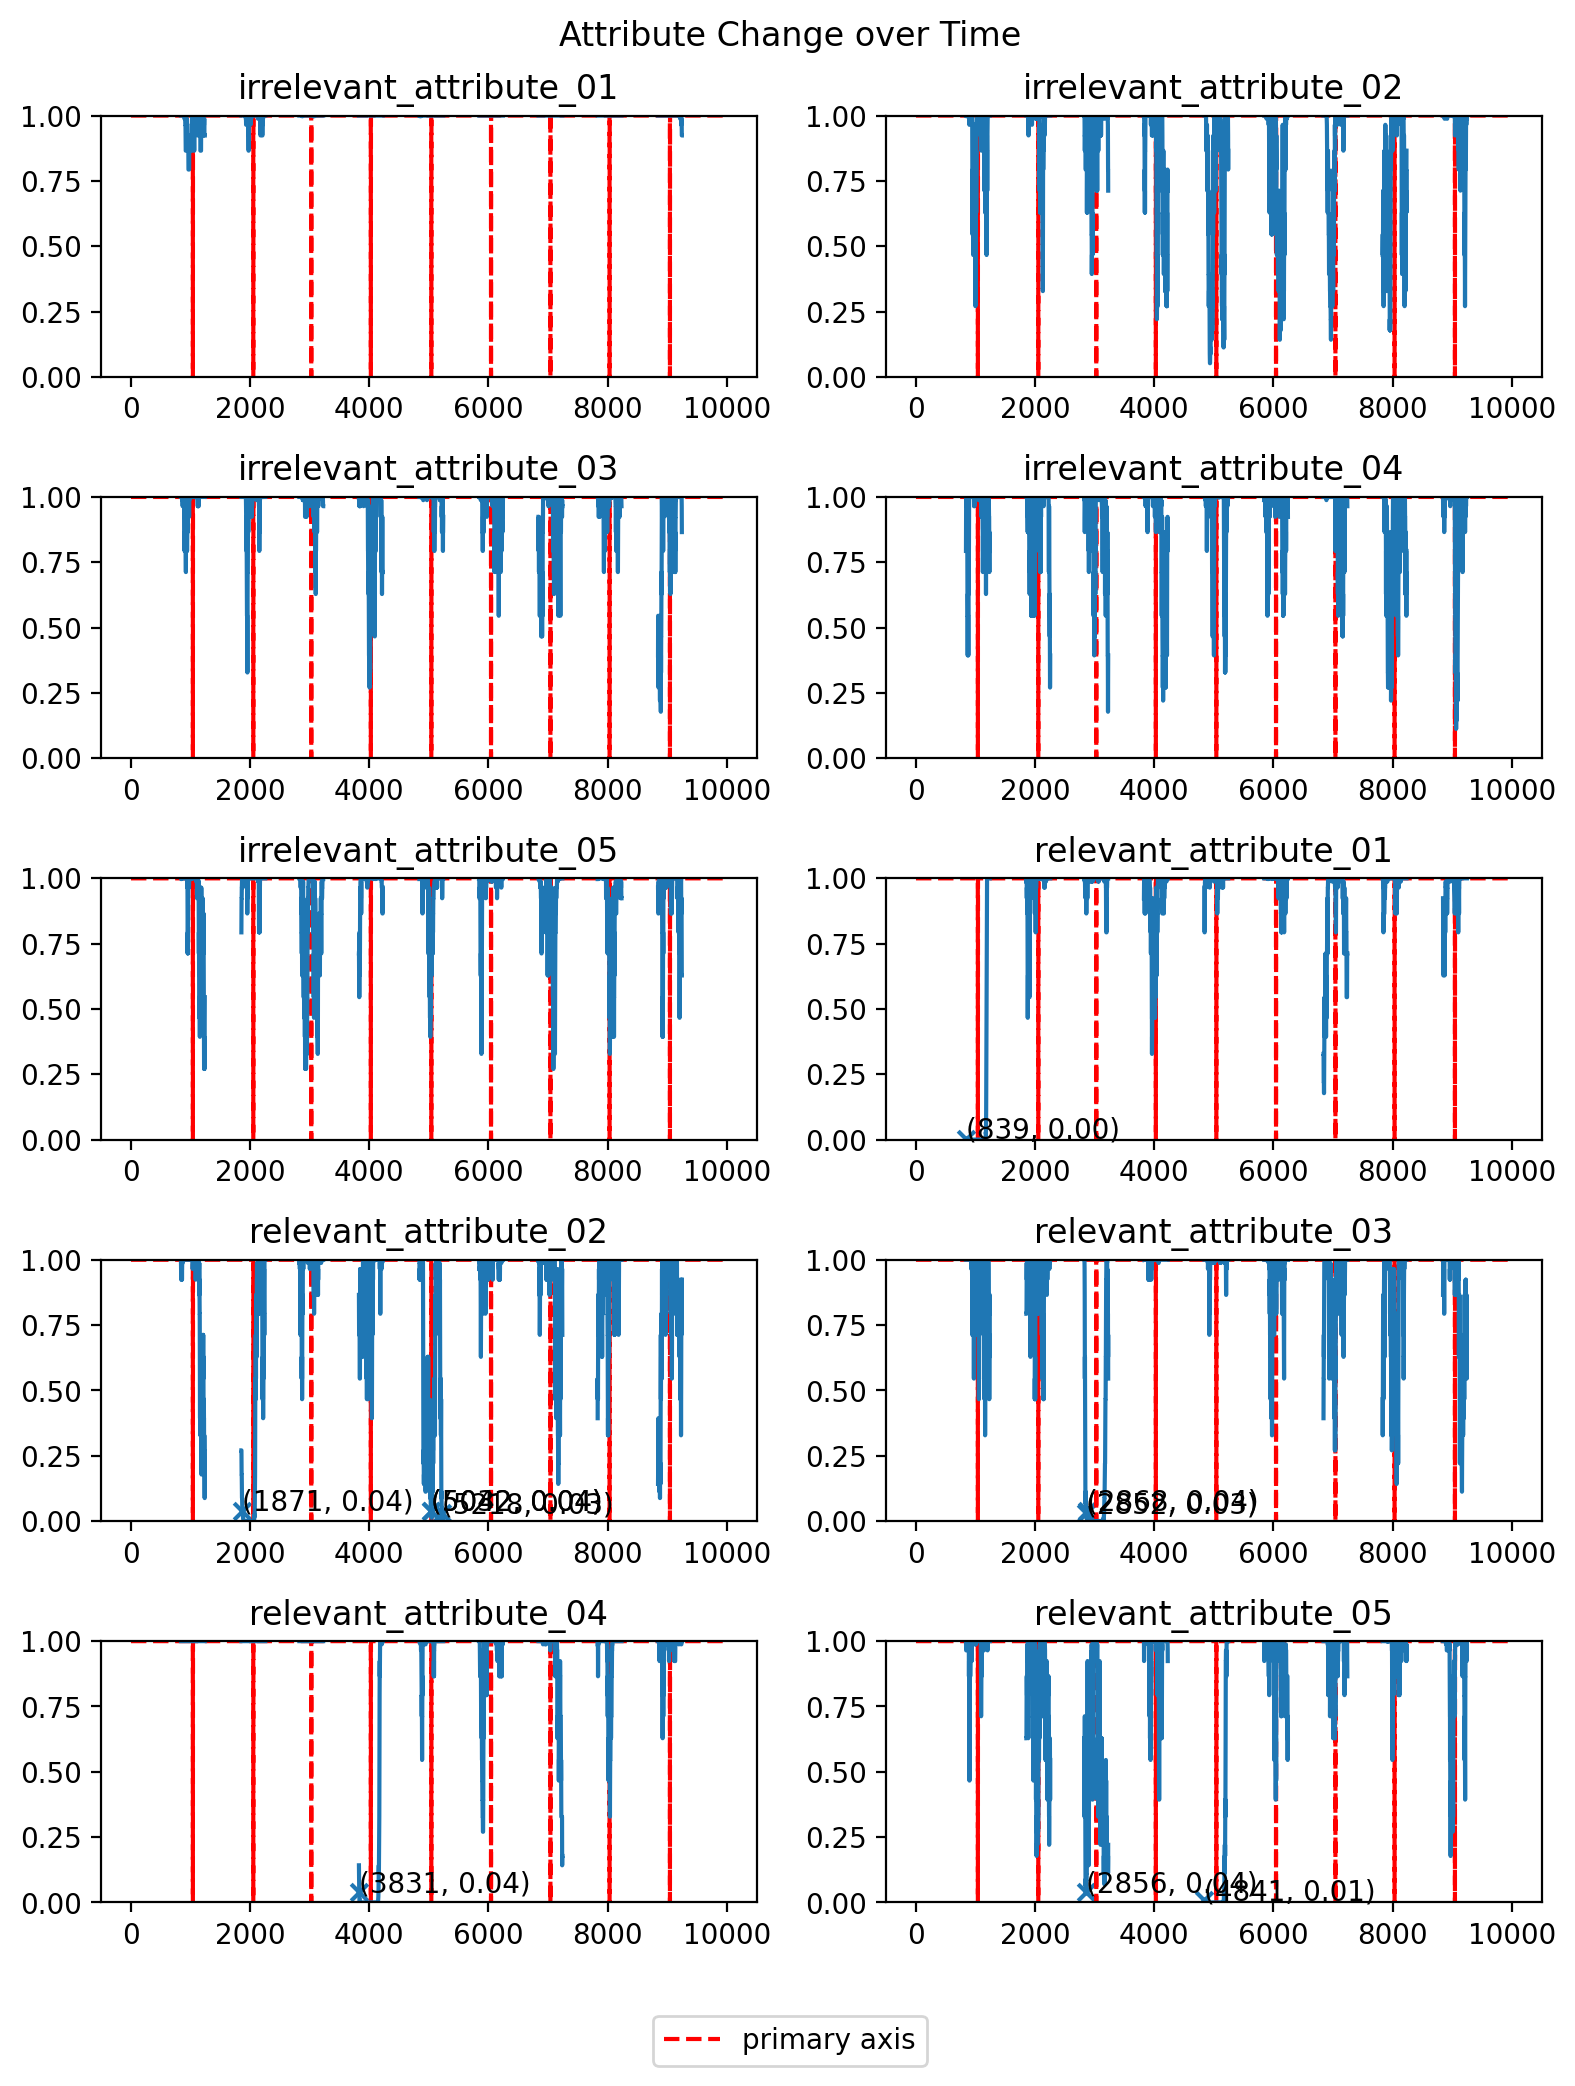

In [8]:
# plot the change point explanations
drift_explanation.plot_primary_and_secondary_changes(primary_and_secondary_changes)
pass

In [9]:
drift_explanation.get_possible_change_explanations(primary_and_secondary_changes, max_distance=200)

{1039: [{'detector': 'relevant_attribute_01',
   'change_point': 839,
   'distance': -200}],
 2053: [{'detector': 'relevant_attribute_02',
   'change_point': 1871,
   'distance': -182}],
 3026: [{'detector': 'relevant_attribute_03',
   'change_point': 2868,
   'distance': -158},
  {'detector': 'relevant_attribute_05',
   'change_point': 2856,
   'distance': -170},
  {'detector': 'relevant_attribute_03',
   'change_point': 2852,
   'distance': -174}],
 4026: [{'detector': 'relevant_attribute_04',
   'change_point': 3831,
   'distance': -195}],
 5041: [{'detector': 'relevant_attribute_02',
   'change_point': 5042,
   'distance': 1},
  {'detector': 'relevant_attribute_02', 'change_point': 5032, 'distance': -9},
  {'detector': 'relevant_attribute_02', 'change_point': 5218, 'distance': 177},
  {'detector': 'relevant_attribute_05',
   'change_point': 4841,
   'distance': -200}],
 6043: [],
 7040: [],
 8033: [],
 9046: []}